In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#from Ipython import display 
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [5]:
df = pd.read_csv(r'C:\Users\amechi1ajs\Documents\developer2020\survey-results-public.csv')


In [6]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [7]:
num_rows = df.shape[0]
num_rows

64461

In [8]:
num_cols = df.shape[1]
num_cols

61

In [9]:
no_null_cols = set(df.columns[df.isnull().mean() == 0])
no_null_cols

{'Respondent'}

In [10]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [11]:
df['ConvertedComp'].median() # this will be used to calculate the average salary, which is the mean

54049.0

In [12]:
prof_devel = df['MainBranch'].unique()
prof_devel

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

### 1  What kind of developers are you?







In [13]:
prof_status = df.MainBranch.value_counts() # check for the different categories of developers
prof_status

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

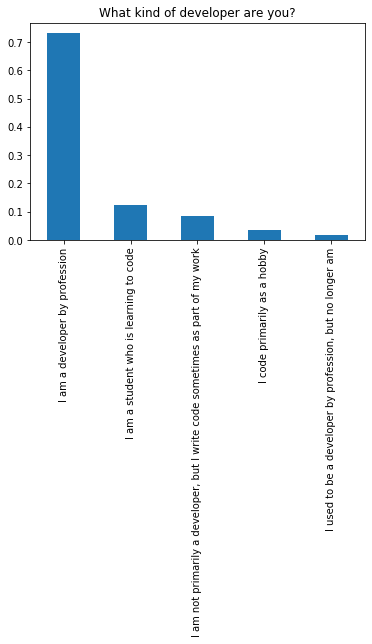

In [14]:
(prof_status/df.shape[0]).plot(kind="bar");
plt.title("What kind of developer are you?");

Text(0.5, 1.0, 'Different countries with number of developers')

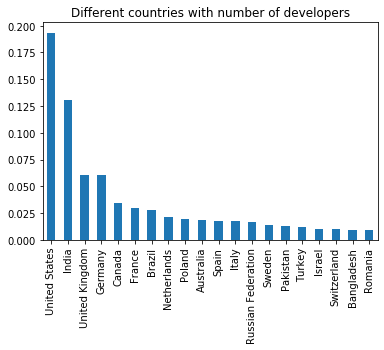

In [15]:
num_country = df.Country.value_counts()

(num_country[:20]/df.shape[0]).plot(kind='bar')
plt.title('Different countries with number of developers')

Text(0.5, 1.0, 'Years you have been coding')

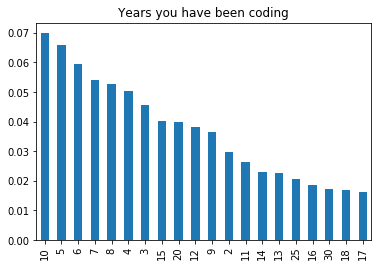

In [16]:
num_yrcode = df.YearsCode.value_counts()
(num_yrcode[:20]/df.shape[0]).plot(kind='bar')
plt.title('Years you have been coding')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [18]:
df.PurchaseWhat.value_counts()

I have little or no influence       16987
I have some influence               15379
I have a great deal of influence     6998
Name: PurchaseWhat, dtype: int64

In [19]:
df.PurchaseWhat.unique() # this could be used to test for the influence of a recommendation or online survey

array([nan, 'I have little or no influence',
       'I have a great deal of influence', 'I have some influence'],
      dtype=object)

In [20]:
df.NEWPurchaseResearch.value_counts()

Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow                                                                                            7349
Start a free trial;Ask developers I know/work with                                                                                                                                            4587
Start a free trial                                                                                                                                                                            3467
Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow;Read ratings or reviews on third party sites like G2Crowd                                  3181
Start a free trial;Visit developer communities like Stack Overflow                                                                                                                            2775
                         

Text(0.5, 1.0, 'Research about purchases')

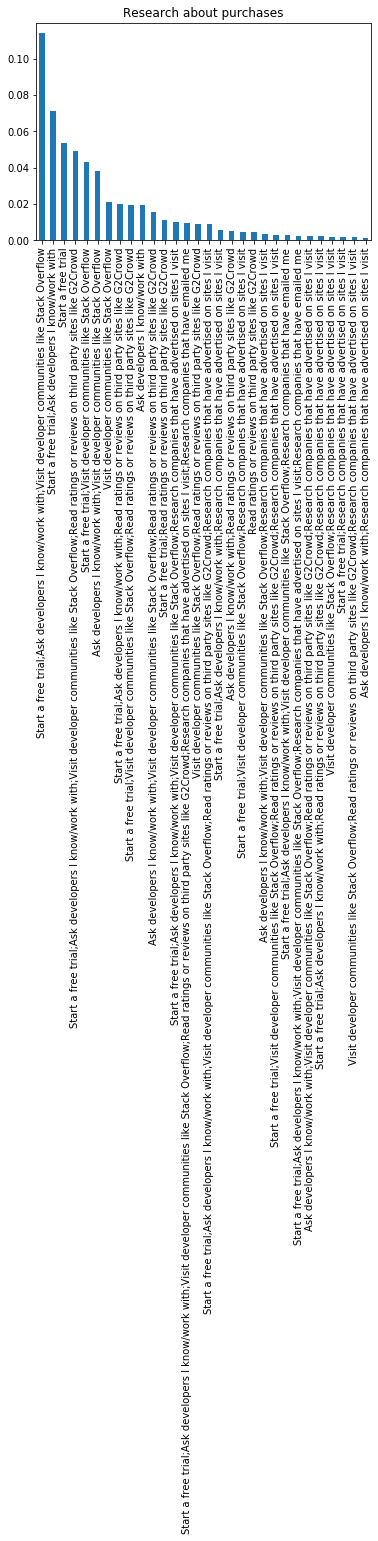

In [21]:
purch_stat = df.NEWPurchaseResearch.value_counts()
(purch_stat[:30]/df.shape[0]).plot(kind='bar')
plt.title('Research about purchases')

In [22]:
df.NEWPurchaseResearch.unique()

array(['Start a free trial;Ask developers I know/work with', nan,
       'Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow;Read ratings or reviews on third party sites like G2Crowd;Research companies that have advertised on sites I visit',
       'Ask developers I know/work with;Read ratings or reviews on third party sites like G2Crowd',
       'Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow;Read ratings or reviews on third party sites like G2Crowd',
       'Start a free trial',
       'Start a free trial;Ask developers I know/work with;Visit developer communities like Stack Overflow',
       'Ask developers I know/work with',
       'Ask developers I know/work with;Visit developer communities like Stack Overflow',
       'Research companies that have advertised on sites I visit',
       'Visit developer communities like Stack Overflow;Read ratings or reviews on third party sites like 

In [23]:
df.Employment.value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [24]:
#pd.DataFrame(df.query("MainBranch == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'MainBranch']).mean()['CompTotal'])

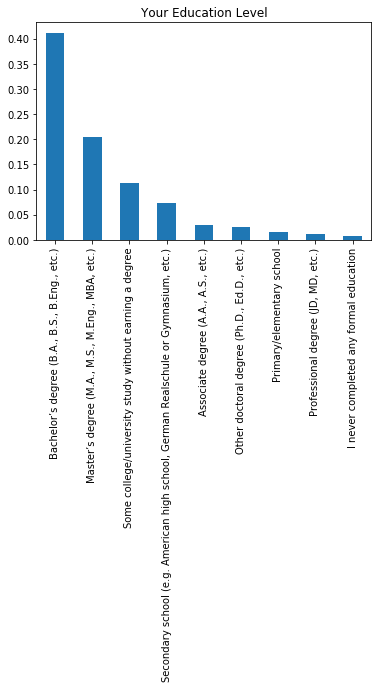

In [25]:
educat = df.EdLevel.value_counts()
(educat/df.shape[0]).plot(kind="bar");
plt.title("Your Education Level");

### 2. Number of developers/students who seek help about the online classes?

In [26]:
num_stud = df.SurveyEase.value_counts() # number of students who may get helps from the online survey submission
num_stud

Easy                          34626
Neither easy nor difficult    16476
Difficult                       700
Name: SurveyEase, dtype: int64

In [27]:
# checking the classification of the survey report among the respondent.
# the result below really gives us an insight about the survey.
df.groupby(['SurveyEase']).mean()['Respondent']

SurveyEase
Difficult                     28956.042857
Easy                          29054.869607
Neither easy nor difficult    29343.751032
Name: Respondent, dtype: float64

### Does the survey suggest anything

In [28]:
# let's look at the correlation matrix
corr_matrix = df.corr()
corr_matrix['ConvertedComp'].sort_values(ascending=False)


ConvertedComp    1.000000
Age              0.107002
WorkWeekHrs      0.032612
CompTotal        0.000000
Respondent      -0.005805
Name: ConvertedComp, dtype: float64

In [29]:
df.groupby(['SurveyEase']).mean() ['ConvertedComp']

SurveyEase
Difficult                      73534.285223
Easy                          108310.958586
Neither easy nor difficult     93668.088655
Name: ConvertedComp, dtype: float64

### Find each employment level salary?

In [30]:
# the avarage salary for the different employment level

df.groupby(['Employment']).mean()['ConvertedComp']

Employment
Employed full-time                                      107402.587265
Employed part-time                                       42819.782319
Independent contractor, freelancer, or self-employed     88509.934576
Not employed, and not looking for work                            NaN
Not employed, but looking for work                                NaN
Retired                                                           NaN
Student                                                           NaN
Name: ConvertedComp, dtype: float64

In [31]:
# report on the survey ease with different concerns and features.
df.groupby(['SurveyEase']).mean()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
SurveyEase,,,,,
Difficult,28956.042857,29.488889,3.424658e+46,73534.285223,40.388608
Easy,29054.869607,30.952544,3.916189e+26,108310.958586,40.819801
Neither easy nor difficult,29343.751032,30.619960,1.189117e+243,93668.088655,40.629448


In [32]:
df.groupby(['NEWPurchaseResearch']).mean()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
NEWPurchaseResearch,,,,,
Ask developers I know/work with,31302.388889,29.454978,2.973875e+06,117879.078947,40.841628
Ask developers I know/work with;Read ratings or reviews on third party sites like G2Crowd,31743.491379,29.874126,5.116477e+05,96574.276596,39.892857
Ask developers I know/work with;Read ratings or reviews on third party sites like G2Crowd;Research companies that have advertised on sites I visit,28185.638298,31.156250,3.907018e+06,151137.000000,39.516129
Ask developers I know/work with;Read ratings or reviews on third party sites like G2Crowd;Research companies that have advertised on sites I visit;Research companies that have emailed me,30899.333333,25.000000,4.230168e+05,38828.000000,41.750000
Ask developers I know/work with;Read ratings or reviews on third party sites like G2Crowd;Research companies that have emailed me,28184.666667,28.400000,1.428571e+149,500488.571429,40.875000
...,...,...,...,...,...
Visit developer communities like Stack Overflow;Read ratings or reviews on third party sites like G2Crowd;Research companies that have advertised on sites I visit;Research companies that have emailed me,22134.653846,26.550000,4.473636e+04,24033.545455,43.866667
Visit developer communities like Stack Overflow;Read ratings or reviews on third party sites like G2Crowd;Research companies that have emailed me,35593.666667,33.727273,3.448733e+05,35927.166667,46.714286
Visit developer communities like Stack Overflow;Research companies that have advertised on sites I visit,27869.270492,29.263158,4.271210e+05,76306.893617,37.938596


### how does the survey influence the online enrollment?

In [33]:
#df['NEWPurchaseResearch'].dropna()
#df['SurveyEase'].dropna()

In [34]:
df['LanguageDesireNextYear'].unique()

array(['C#;HTML/CSS;JavaScript', 'Python;Swift',
       'Objective-C;Python;Swift', ...,
       'Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;Perl;PHP;Python;SQL',
       'Assembly;C#;Kotlin',
       'Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;Go;HTML/CSS;Java;JavaScript;Kotlin;Objective-C;PHP;Python;SQL;Swift;TypeScript'],
      dtype=object)

In [35]:
# what does the survey says from women who are making some purchase?
data_women = df.loc[
                      (df["Gender"]=="Woman") | (df["SurveyEase"]==""),
                       ["NEWPurchaseResearch", "Gender", "SurveyEase"]]

data_women.head(20)

,NEWPurchaseResearch,Gender,SurveyEase
34,Visit developer communities like Stack Overflo...,Woman,Easy
39,NaN,Woman,Easy
55,NaN,Woman,Easy
65,Start a free trial;Ask developers I know/work ...,Woman,Neither easy nor difficult
84,Start a free trial;Ask developers I know/work ...,Woman,Easy
87,Start a free trial;Ask developers I know/work ...,Woman,Easy
88,NaN,Woman,Easy
95,NaN,Woman,Easy
99,Start a free trial,Woman,Easy
105,Start a free trial;Ask developers I know/work ...,Woman,Easy


In [36]:
# what does the survey says from men who are making some purchase?
data_men = df.loc[
        (df["Gender"]=="Man") | (df["SurveyEase"]==""),
            ["NEWPurchaseResearch", "Gender", "SurveyEase"]]

data_men.head(20)

,NEWPurchaseResearch,Gender,SurveyEase
0,Start a free trial;Ask developers I know/work ...,Man,Neither easy nor difficult
3,NaN,Man,NaN
4,Start a free trial;Ask developers I know/work ...,Man,Easy
5,Ask developers I know/work with;Read ratings o...,Man,Neither easy nor difficult
7,Start a free trial;Ask developers I know/work ...,Man,Easy
8,Start a free trial,Man,Neither easy nor difficult
9,Start a free trial;Ask developers I know/work ...,Man,Easy
10,NaN,Man,Easy
11,NaN,Man,Easy
12,Start a free trial,Man,Neither easy nor difficult


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002718594A208>,
      dtype=object)

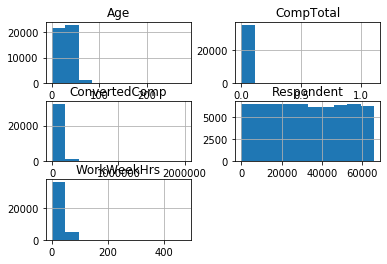

In [37]:
df.hist() # checking to see what the data is saying

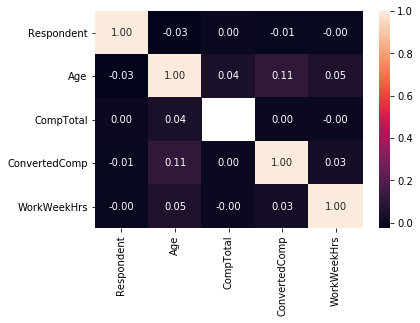

In [38]:
sns.heatmap(df.corr(),annot=True, fmt='.2f') # looking some correlation

In [39]:
# let's investigate the data for ethnicity on the Employment
data_ethnic = df.loc[
                      (df["Ethnicity"]=="") | (df["Country"]=="United States"),
                       ["Employment", "Ethnicity", "Country"]]

data_ethnic.head(20)

,Employment,Ethnicity,Country
4,Employed full-time,White or of European descent,United States
7,Employed full-time,White or of European descent,United States
13,Employed full-time,White or of European descent,United States
16,Employed full-time,White or of European descent,United States
17,Employed full-time,White or of European descent,United States
18,Employed full-time,White or of European descent,United States
26,Employed full-time,White or of European descent,United States
34,"Not employed, but looking for work",White or of European descent,United States
39,Student,Hispanic or Latino/a/x,United States
40,Employed full-time,NaN,United States


In [40]:
# education level compare to employment
data_educat = df.loc[
        (df["EdLevel"]=="") | (df["Country"]=="United States"),
                       ["Employment", "EdLevel", "Country"]]

data_educat.head(20)


,Employment,EdLevel,Country
4,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States
7,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States
13,Employed full-time,"Associate degree (A.A., A.S., etc.)",United States
16,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States
17,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States
18,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States
26,Employed full-time,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States
34,"Not employed, but looking for work","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United States
39,Student,"Associate degree (A.A., A.S., etc.)",United States
40,Employed full-time,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United States


In [41]:
# the overview of the people learning devOp

data_devOp = df.loc[
        (df["NEWLearn"]=="Once a year") | (df["DevType"]==""),
                       ["Employment", "NEWLearn", "DevType"]]


In [42]:
# checking devOp that is "once a year" to understand the DevType categories.

data_devOp.head(20)

,Employment,NEWLearn,DevType
0,"Independent contractor, freelancer, or self-em...",Once a year,"Developer, desktop or enterprise applications;..."
1,Employed full-time,Once a year,"Developer, full-stack;Developer, mobile"
3,NaN,Once a year,NaN
4,Employed full-time,Once a year,NaN
5,Employed full-time,Once a year,"Designer;Developer, front-end;Developer, mobile"
7,Employed full-time,Once a year,"Developer, back-end;Developer, desktop or ente..."
8,"Independent contractor, freelancer, or self-em...",Once a year,"Developer, full-stack"
15,"Independent contractor, freelancer, or self-em...",Once a year,"Database administrator;Developer, back-end;Dev..."
16,Employed full-time,Once a year,"Developer, full-stack"
18,Employed full-time,Once a year,"Developer, full-stack"


### What is the language that people desire to use next year based on the Job satisfaction?

In [43]:
Lang_desir = df.loc[
        (df["JobSat"]=="Very satisfied") | (df["LanguageDesireNextYear"]==""),
                       ["LanguageDesireNextYear", "LanguageWorkedWith", "JobSat"]]


In [44]:
Lang_desir.head(20)

# desired language that people used due to a report of job satisfaction 

,LanguageDesireNextYear,LanguageWorkedWith,JobSat
6,C#;HTML/CSS;PHP,C#;HTML/CSS;PHP,Very satisfied
9,HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,Very satisfied
12,Python,C;JavaScript;Python,Very satisfied
15,Go,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Very satisfied
17,HTML/CSS;Perl,Bash/Shell/PowerShell;HTML/CSS;Perl,Very satisfied
22,C#;C++,Bash/Shell/PowerShell;C#;C++,Very satisfied
23,Bash/Shell/PowerShell;Go;Java;Julia;Kotlin;Pyt...,Bash/Shell/PowerShell;Java;Kotlin;PHP;SQL,Very satisfied
36,Dart;Python,Bash/Shell/PowerShell;Haskell;HTML/CSS;JavaScr...,Very satisfied
37,JavaScript;Rust;TypeScript,HTML/CSS;JavaScript;Python;Ruby;Rust,Very satisfied
41,Bash/Shell/PowerShell;C#;Go;Java;Python;Rust,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Very satisfied


### What is the data worked with from the dev. type?

In [45]:
data_worked_on = df.loc[
        (df["DatabaseWorkedWith"]=="Microsoft SQL Server") | (df["DatabaseDesireNextYear"]==""),
                       ["DevType", "DatabaseDesireNextYear", "DatabaseWorkedWith"]]

In [46]:
data_worked_on.head(15)

,DevType,DatabaseDesireNextYear,DatabaseWorkedWith
9,"Database administrator;Developer, full-stack;D...",Microsoft SQL Server,Microsoft SQL Server
40,"Developer, back-end;Developer, front-end;Devel...",Microsoft SQL Server,Microsoft SQL Server
43,"Data or business analyst;Developer, back-end;P...",Microsoft SQL Server,Microsoft SQL Server
48,"Developer, back-end;Developer, desktop or ente...",Microsoft SQL Server,Microsoft SQL Server
57,"Developer, back-end",Microsoft SQL Server,Microsoft SQL Server
64,"Developer, back-end;Developer, front-end;Devel...",Couchbase;Elasticsearch;Redis,Microsoft SQL Server
81,"Developer, back-end;Developer, full-stack;Deve...",Microsoft SQL Server,Microsoft SQL Server
135,"Developer, desktop or enterprise applications",Microsoft SQL Server,Microsoft SQL Server
140,"Developer, back-end;Developer, front-end;Devel...",Microsoft SQL Server;MongoDB;SQLite,Microsoft SQL Server
143,System administrator,NaN,Microsoft SQL Server


In [47]:
df['Hobbyist'].unique()

array(['Yes', 'No', nan], dtype=object)

In [48]:
# What proportion of individuals in the dataset reported a work weekly?
prop_work = 1 - df.isnull()['WorkWeekHrs'].mean()

prop_work

0.6383860008377158

In [49]:
data_transf = df[['Age','CompTotal','ConvertedComp','WorkWeekHrs']]

data_mod = data_transf.dropna(subset=['ConvertedComp'],axis=0)

In [50]:
data_mod.head()

,Age,CompTotal,ConvertedComp,WorkWeekHrs
7,36.0,116000.0,116000.0,39.0
9,22.0,25000.0,32315.0,36.0
10,23.0,31000.0,40070.0,40.0
11,49.0,1100.0,14268.0,40.0
12,53.0,3000.0,38916.0,36.0


In [51]:
# dropping the missing value
data_mod2 = data_mod.dropna(subset=['Age','CompTotal','ConvertedComp','WorkWeekHrs'], how='any')

In [52]:
X = data_mod2[['Age','CompTotal','WorkWeekHrs']]
y = data_mod2['ConvertedComp']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

In [54]:
lm_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [55]:
y_test_preds = lm_model.predict(X_test)
r_test = r2_score(y_test, y_test_preds)

In [56]:
r_test

0.012711734787870355

In [1]:
data_anal = df[['Age','CompTotal','ConvertedComp','WorkWeekHrs']]

NameError: name 'df' is not defined

### Filling the missing values with mean

In [58]:
data_imp = data_anal.dropna(subset=['ConvertedComp'], axis=0)

data_imp.head()

,Age,CompTotal,ConvertedComp,WorkWeekHrs
7,36.0,116000.0,116000.0,39.0
9,22.0,25000.0,32315.0,36.0
10,23.0,31000.0,40070.0,40.0
11,49.0,1100.0,14268.0,40.0
12,53.0,3000.0,38916.0,36.0


In [59]:
# imputing the mean for the rest of the data

data_imp2 = lambda col: col.fillna(col.mean())

imputed_data = data_imp.apply(data_imp2, axis=0)

imputed_data.head()

,Age,CompTotal,ConvertedComp,WorkWeekHrs
7,36.0,116000.0,116000.0,39.0
9,22.0,25000.0,32315.0,36.0
10,23.0,31000.0,40070.0,40.0
11,49.0,1100.0,14268.0,40.0
12,53.0,3000.0,38916.0,36.0


In [60]:
# fitting and modeling

X = imputed_data[['Age','CompTotal','WorkWeekHrs']]
                  
y = imputed_data['ConvertedComp']       

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model2 = LinearRegression(normalize=True) # Instantiate
lm_model2.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds2 = lm_model2.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds2)
length_y_test = len(y_test)

In [61]:
length_y_test

10427

In [62]:
# it looks like it improved compared to the dropped columns.
rsquared_score

0.010825238332260567

### Working with categorical variable

In [63]:
cat_df = df.select_dtypes(include=['object'])

cat_df.shape[1]

56

In [64]:
#Create a copy of the dataframe
cat_df_copy = cat_df.copy()
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def dummy_df(df, cat_cols, dummy_na):
    
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, 
                                                                 dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df


In [ ]:
df  = df.dropna(subset=['ConvertedComp'], axis=0)


cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

new_df = dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(new_df.shape)

In [ ]:
# taking a look at the categorical variables

def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    
    
    #Dropping the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Dropping columns with NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = dummy_df(df, cat_cols, dummy_na)

    # Mean 
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #explanatory and response variables splitting
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #train and test splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train) 

    #Predicting
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Scoring of the model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Testing the function
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(new_df, 'ConvertedComp', 
                                                                                           cat_cols_lst, dummy_na=False)

   